In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import pickle

In [2]:
data = pd.read_csv('AAPL.csv')
data = data[data['Date'] > '2012-01-01']
data

,Date,Open,High,Low,Close,Adj Close,Volume
7835,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575917,302220800
7836,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643503,260022000
7837,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783874,271269600
7838,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917513,318292800
7839,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897022,394024400
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [3]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2574 entries, 7835 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2574 non-null   object 
 1   Open       2574 non-null   float64
 2   High       2574 non-null   float64
 3   Low        2574 non-null   float64
 4   Close      2574 non-null   float64
 5   Adj Close  2574 non-null   float64
 6   Volume     2574 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 160.9+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2.574000e+03
mean,51.636792,52.188042,51.098482,51.666347,49.884953,2.124386e+08
std,42.052939,42.574277,41.552044,42.091305,42.725565,1.748178e+08
min,13.856071,14.271429,13.753571,13.947500,12.119166,4.100000e+07
25%,23.757232,23.989375,23.526250,23.756965,21.463586,1.014306e+08
50%,33.491251,33.703749,33.250000,33.538750,31.665937,1.485122e+08
75%,55.631252,56.186251,54.954999,55.765624,54.157788,2.610347e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.506120e+09


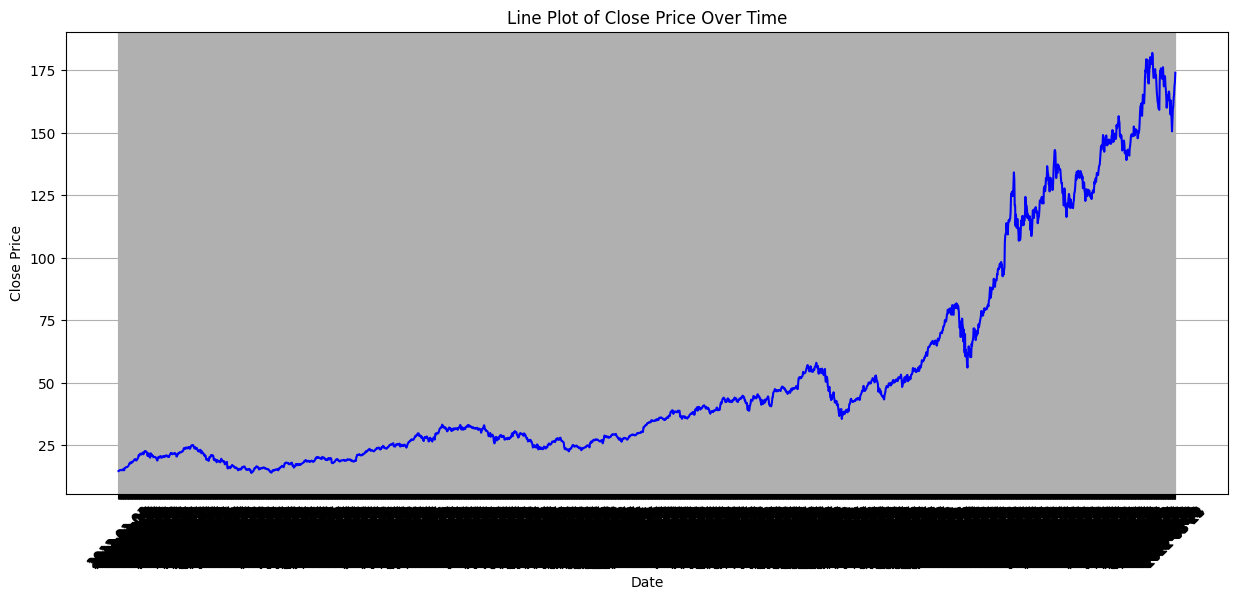

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Close'], color='b')
plt.title('Line Plot of Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [7]:
train_split = int(len(data) * 0.90)

In [8]:
features = data.drop(columns=['Date','Close','Adj Close'],axis=1)
target = data['Close']
features

,Open,High,Low,Volume
7835,14.621429,14.732143,14.607143,302220800
7836,14.642857,14.810000,14.617143,260022000
7837,14.819643,14.948214,14.738214,271269600
7838,14.991786,15.098214,14.972143,318292800
7839,15.196429,15.276786,15.048214,394024400
...,...,...,...,...
10404,160.509995,164.479996,159.759995,123351200
10405,163.509995,166.350006,163.009995,95811400
10406,165.509995,169.419998,164.910004,81532000
10407,167.990005,172.639999,167.649994,98062700


In [9]:
X_train, X_test = features[:train_split], features[train_split:]
Y_train, Y_test = target[:train_split], target[train_split:]

In [10]:
print(len(X_train))
print(len(X_test))
print(len(Y_test))

2316
258
258


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import classification_report


lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [13]:
r2 = r2_score(Y_test, y_test_pred)
r2

0.996561564728803

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_test_pred)
mse

0.9475740310680876

In [15]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_test_pred)
mae

0.7410490593504916

In [16]:
print(lr.score(X_train,Y_train))
lr.score(X_test,Y_test)

0.9997956614744621


0.996561564728803

In [17]:
df_pred = pd.DataFrame(Y_train.values, columns=['Actual'])
df_pred['Predicted'] = y_train_pred
df_pred = df_pred.reset_index()
df_pred

,index,Actual,Predicted
0,0,14.686786,14.688106
1,1,14.765714,14.749481
2,2,14.929643,14.854246
3,3,15.085714,15.050071
4,4,15.061786,15.137204
...,...,...,...
2311,2311,121.959999,122.103249
2312,2312,121.029999,120.075307
2313,2313,123.989998,122.744623
2314,2314,125.570000,126.167486


<Axes: >

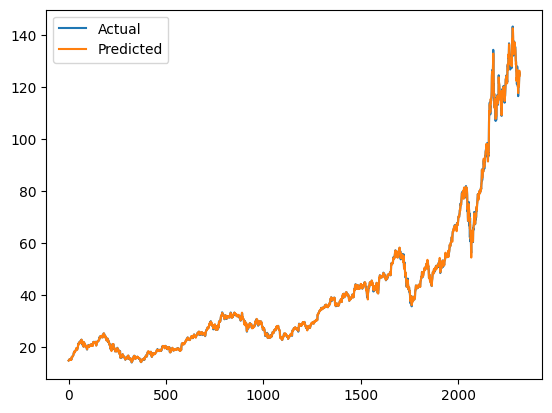

In [18]:
df_pred[['Actual','Predicted']].plot()

In [19]:
pickle.dump(lr,open('model.pkl','wb'))